# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rusape
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | uk
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | rungata
City not found. Skipping...
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | wanning
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | baiao
Processing Record 16 of Set 1 | boras
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | atuona
Processing Record 22 of 

Processing Record 35 of Set 4 | zhangye
Processing Record 36 of Set 4 | atar
Processing Record 37 of Set 4 | souillac
Processing Record 38 of Set 4 | hay river
Processing Record 39 of Set 4 | soyo
Processing Record 40 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | halalo
City not found. Skipping...
Processing Record 45 of Set 4 | moa
Processing Record 46 of Set 4 | nisia floresta
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | todos santos
Processing Record 49 of Set 4 | cape town
Processing Record 0 of Set 5 | yantal
Processing Record 1 of Set 5 | malakal
Processing Record 2 of Set 5 | nerchinskiy zavod
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | vestmanna
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | babanusah
City no

Processing Record 27 of Set 8 | uyar
Processing Record 28 of Set 8 | santa isabel do rio negro
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | bayangol
Processing Record 31 of Set 8 | kvarkeno
Processing Record 32 of Set 8 | leningradskiy
Processing Record 33 of Set 8 | sisimiut
Processing Record 34 of Set 8 | olovyannaya
Processing Record 35 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 36 of Set 8 | sayat
Processing Record 37 of Set 8 | ternate
Processing Record 38 of Set 8 | saint-joseph
Processing Record 39 of Set 8 | darab
Processing Record 40 of Set 8 | macau
Processing Record 41 of Set 8 | oussouye
Processing Record 42 of Set 8 | monte patria
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | sheltozero
Processing Record 46 of Set 8 | apiai
Processing Record 47 of Set 8 | balimo
City not found. Skipping...
Processing Record 48 of Set 8 | yokadouma
Processing Record 4

Processing Record 14 of Set 12 | huangnihe
Processing Record 15 of Set 12 | kuah
Processing Record 16 of Set 12 | clyde river
Processing Record 17 of Set 12 | juba
Processing Record 18 of Set 12 | kodinsk
Processing Record 19 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 20 of Set 12 | tuy hoa
Processing Record 21 of Set 12 | hearst
Processing Record 22 of Set 12 | sao bernardo
Processing Record 23 of Set 12 | orodara
Processing Record 24 of Set 12 | parana
Processing Record 25 of Set 12 | ust-maya
Processing Record 26 of Set 12 | carbonia
Processing Record 27 of Set 12 | dubti
Processing Record 28 of Set 12 | lolua
City not found. Skipping...
Processing Record 29 of Set 12 | san quintin
Processing Record 30 of Set 12 | kudahuvadhoo
Processing Record 31 of Set 12 | lichuan
Processing Record 32 of Set 12 | totness
Processing Record 33 of Set 12 | jishou
Processing Record 34 of Set 12 | tazovskiy
Processing Record 35 of Set 12 | paamiut
Processing Record 36 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lon           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,5.81,81,100,1.03,AR,1670561841
1,rusape,-18.5278,32.1284,17.88,82,99,2.91,ZW,1670561842
2,busselton,-33.6500,115.3333,20.33,54,57,6.31,AU,1670561842
3,sur,22.5667,59.5289,26.34,51,0,3.23,OM,1670561843
4,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1670561843


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,5.81,81,100,1.03,AR,1670561841
1,rusape,-18.5278,32.1284,17.88,82,99,2.91,ZW,1670561842
2,busselton,-33.6500,115.3333,20.33,54,57,6.31,AU,1670561842
3,sur,22.5667,59.5289,26.34,51,0,3.23,OM,1670561843
4,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1670561843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

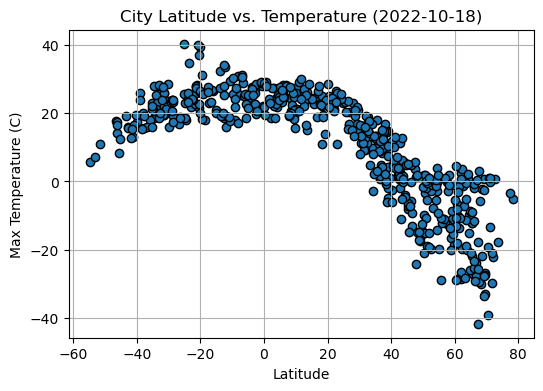

In [8]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

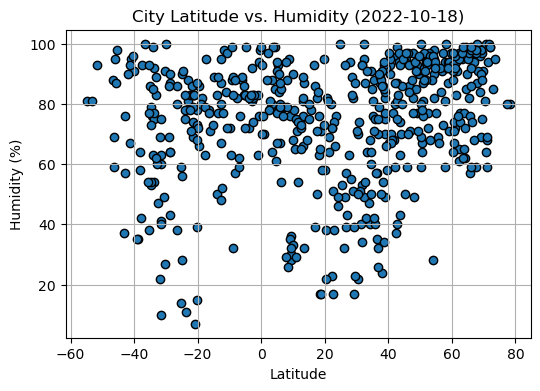

In [9]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

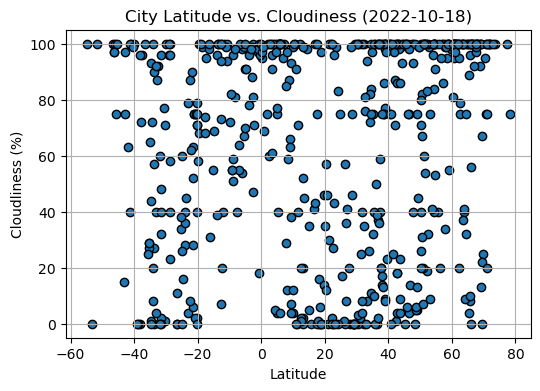

In [10]:
# Build the scatter plots for latitude vs. Cloudiness
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

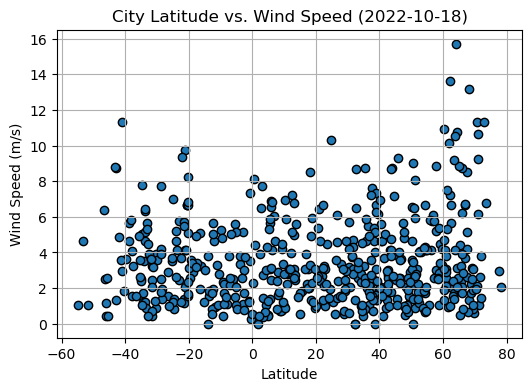

In [11]:
# Build the scatter plots for latitude vs. wind speed 
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"]
          , edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots

def lin_regress(x_value, y_value, y_label, title):

    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, title, fontsize=15, color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0, :])

# Display sample data
northern_hemi_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,sur,22.5667,59.5289,26.34,51,0,3.23,OM,1670561843
5,wanning,18.8003,110.3967,23.34,71,97,5.92,CN,1670561844
6,hirara,24.8000,125.2833,22.92,100,75,10.29,JP,1670561844
7,aasiaat,68.7098,-52.8699,-2.24,96,100,2.23,GL,1670561844
9,georgetown,5.4112,100.3354,26.05,93,40,3.09,MY,1670561432


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df['Lat']<=0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,5.81,81,100,1.03,AR,1670561841
1,rusape,-18.5278,32.1284,17.88,82,99,2.91,ZW,1670561842
2,busselton,-33.6500,115.3333,20.33,54,57,6.31,AU,1670561842
4,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1670561843
8,rikitea,-23.1203,-134.9692,24.19,81,79,5.76,PF,1670561845


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7573780235435853


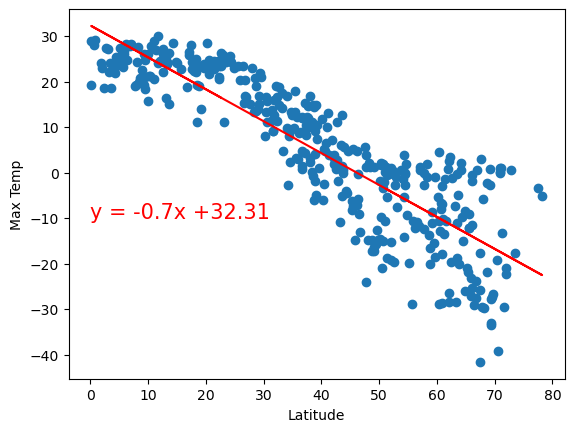

In [27]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lin_regress(x, y, 'Max Temp', (0,-10))

The r-value is: 0.25290156230399014


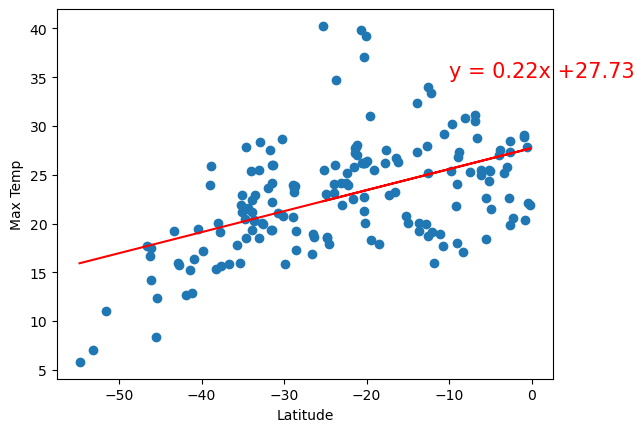

In [28]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lin_regress(x, y, 'Max Temp', (-10,35))

**Discussion about the linear relationship:** 

The northern hemisphere looks to have a strong correlation between latitude and temperature.  This can also be statistically proven with a r-value of -0.76, which indicates a large association.  As for the southern hemisphere, visually this correlation looks much weaker than the northern hemisphere.  With an r-value of 0.26 it still has a statistically significant correlation, but with a lower strength than the northern hemisphere 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1084855071476358


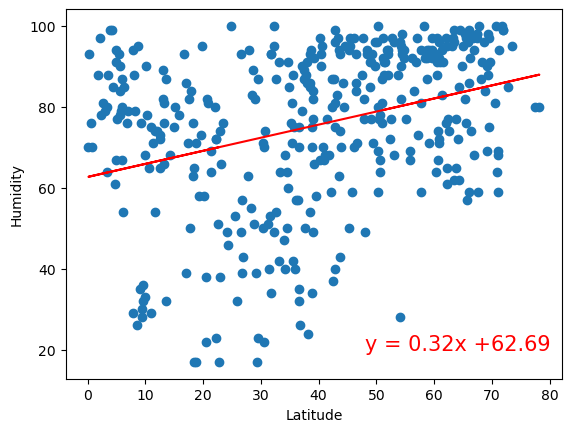

In [29]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_regress(x, y, 'Humidity', (48,20))


The r-value is: 0.023358907216507727


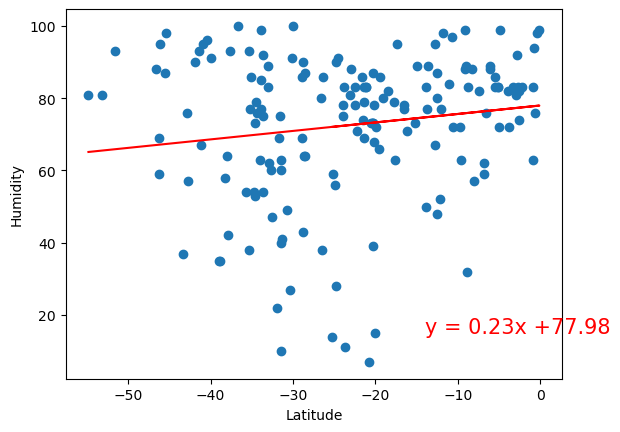

In [30]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_regress(x, y, 'Humidity', (-14,15))


**Discussion about the linear relationship:** 

Both the northern and the southern hemisphere visually don’t look to have too much correlation between humidity and latitude.  However, according to their r-vlaue the northern hemisphere has a low correlation, and the southern hemisphere has no association. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05153316238044174


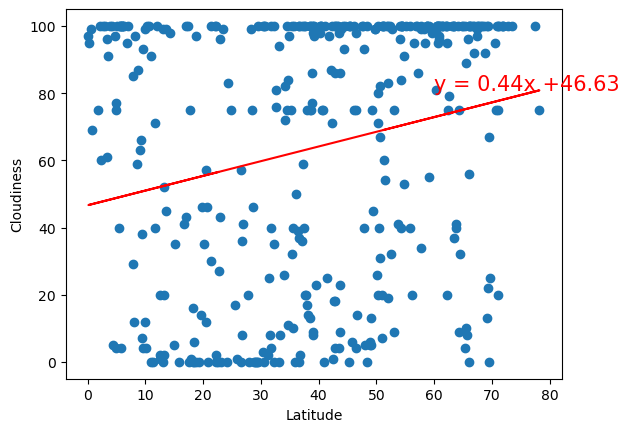

In [31]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lin_regress(x, y, 'Cloudiness', (60,81))


The r-value is: 0.041571837207525913


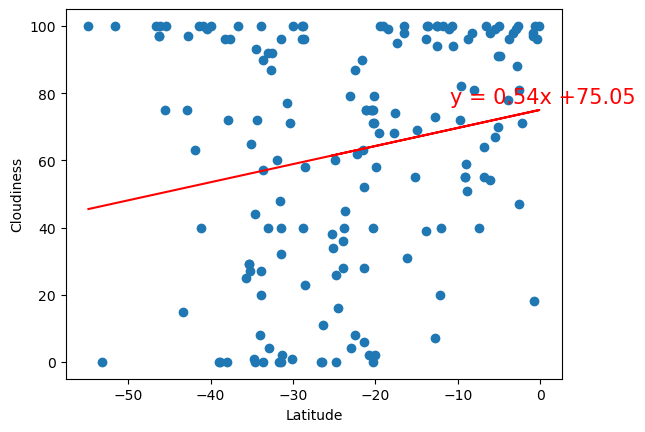

In [32]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_regress(x, y, 'Cloudiness', (-11,77))


**Discussion about the linear relationship:** 

Overall, there is a no correlation between Cloudiness and latitude.  The northern hemisphere has a slightly stronger correlation. Also, the northern hemisphere has more outliers of instances of 0 or 100 cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02375244200523502


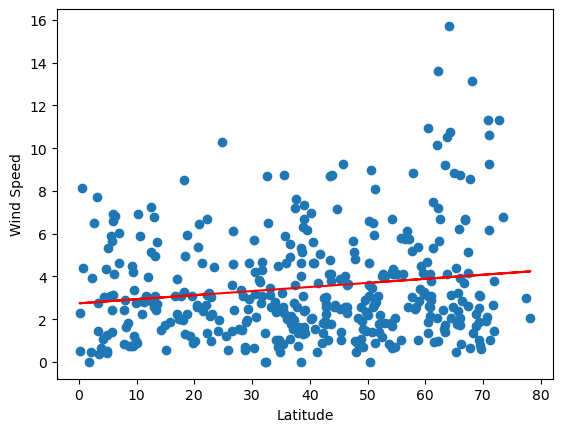

In [33]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_regress(x, y, 'Wind Speed', (50,30))


The r-value is: 0.020744014152236298


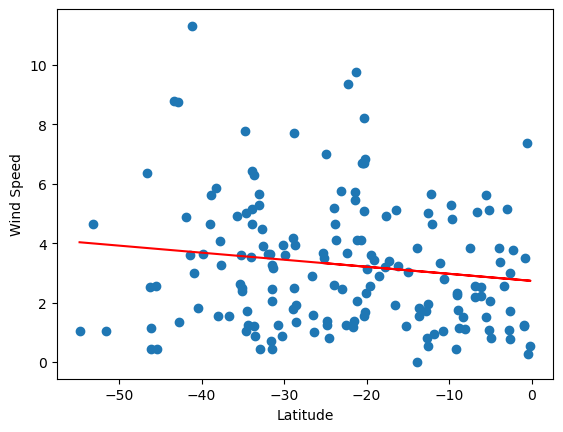

In [34]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_regress(x, y, 'Wind Speed', (-20,22))

**Discussion about the linear relationship:**

Both the northern and southern hemispheres have no correlation between wind speed and latitude according to their r-values.
